In [34]:
import pandas as pd
pd.set_option('display.max_columns', None) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#Loading the dataset
df = pd.read_csv('fraud.csv')

#Visualizing the first few rows of the dataset
print(df.head())

#Examining the data types of each column
print(df.info())

#Checking for null values
print(df.isna().sum())



   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE     

In [36]:
#Dropping the _c39 column
df = df.drop('_c39', axis=1)
#Replacing the ? with NaN Vavlues
df.replace('?', np.nan, inplace=True)
#Examining the result
print(df.describe())

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min

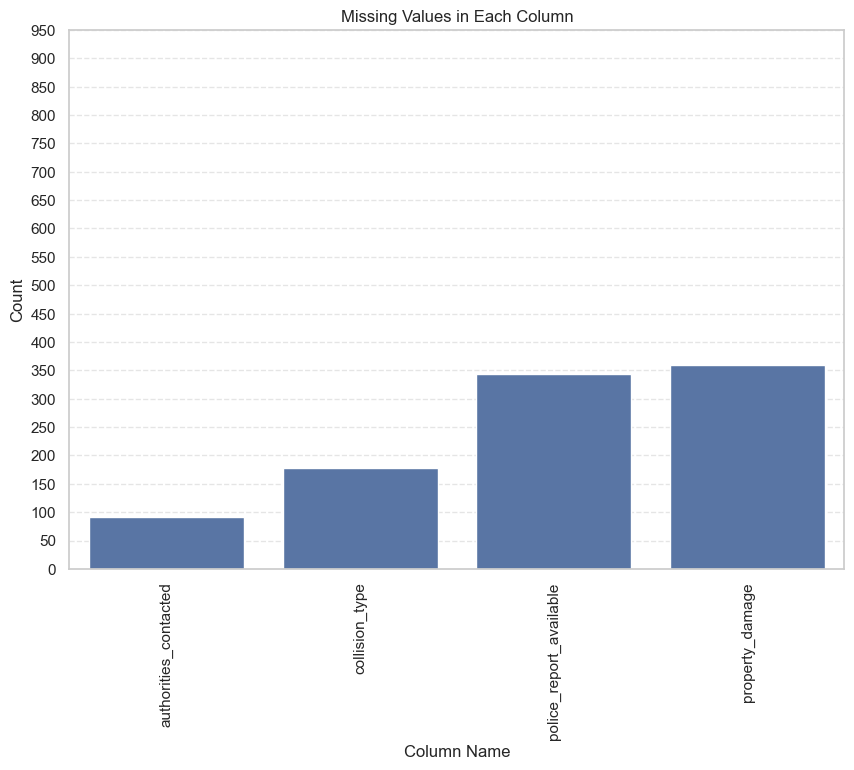

In [37]:
missing = df.isnull().sum() #percentage of missing values
missing= missing[missing>0]
missing.sort_values(inplace=True)
missing= missing.to_frame()
missing.columns = ['Count']
missing.index.names = ['Column Name']
missing= missing.reset_index()
plt.figure(figsize=(10,7))
sns.barplot(x='Column Name', y='Count', data=missing)
plt.xticks(rotation=90)
plt.yticks(range(0,1000,50))
plt.title('Missing Values in Each Column')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [38]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0]) 
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

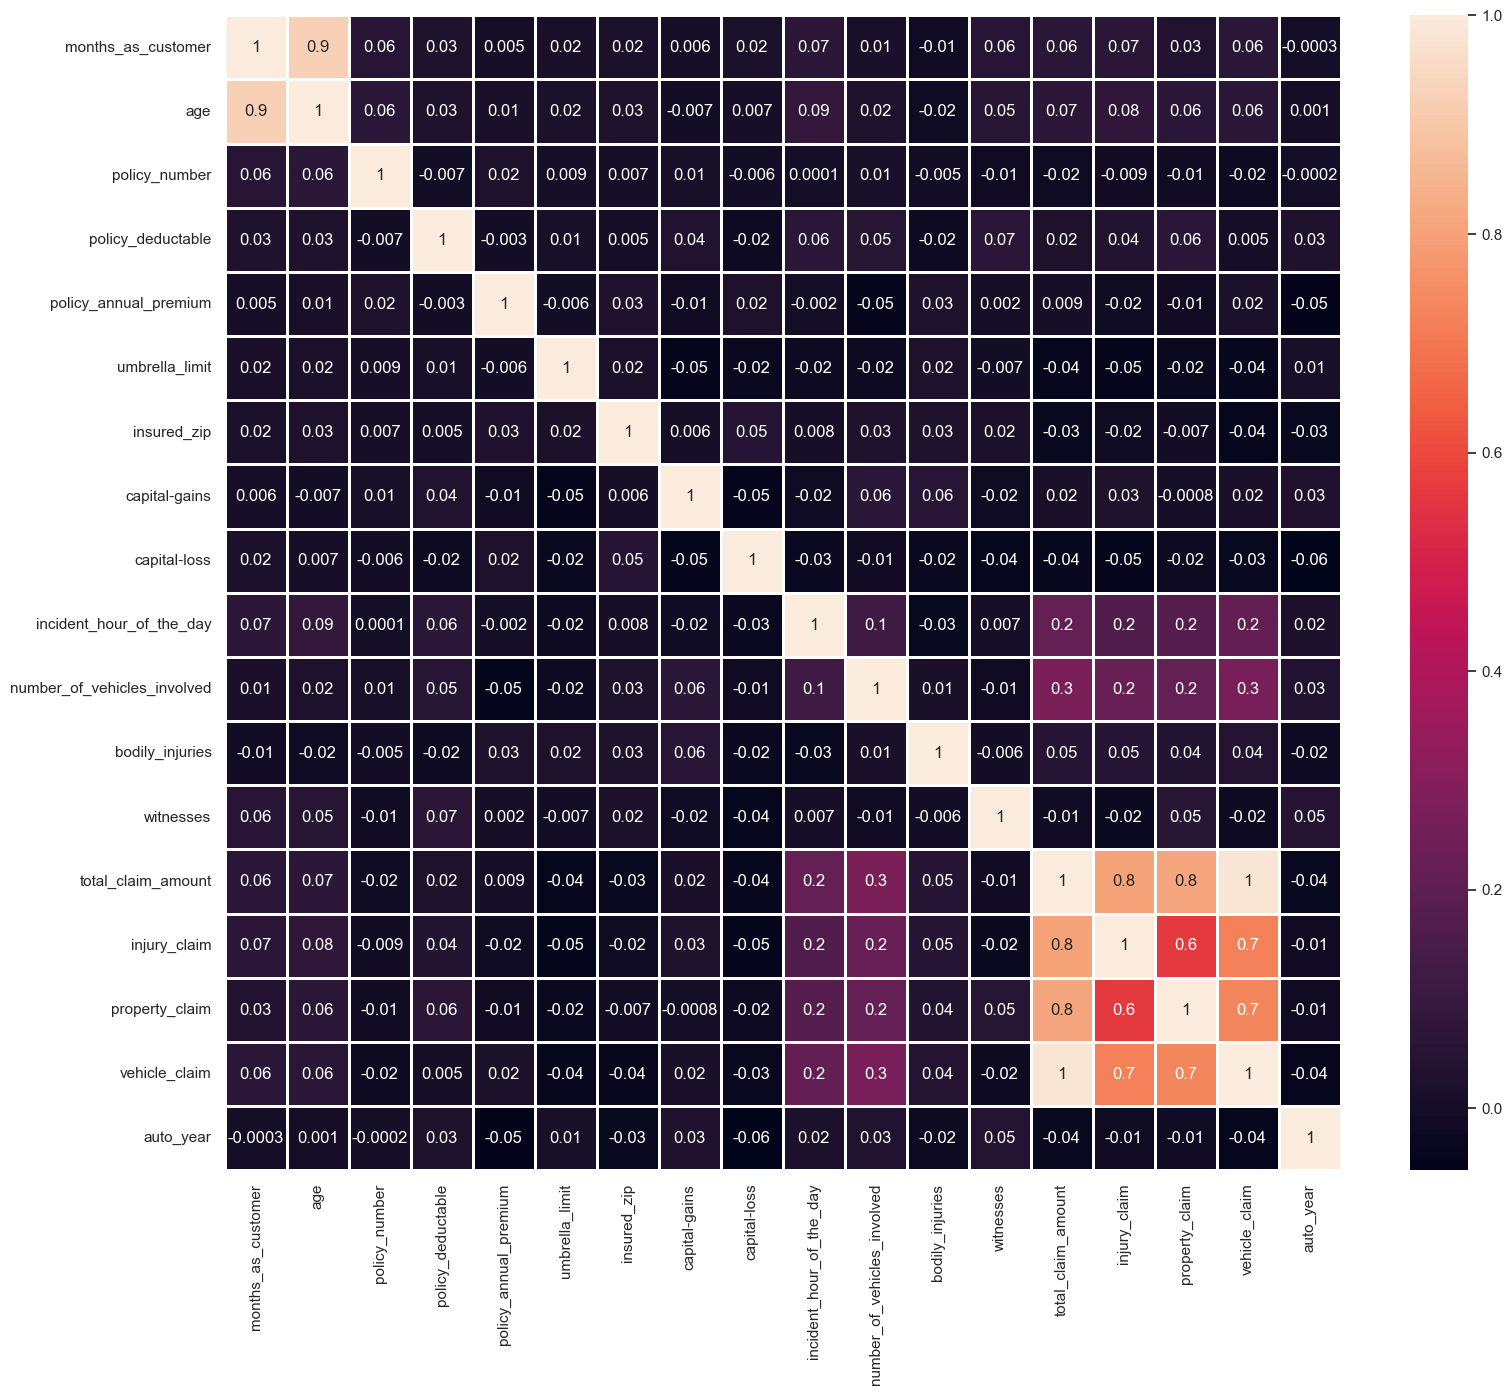

In [39]:
plt.figure(figsize=(18,15))
corr= df.corr(numeric_only=True)
sns.heatmap(data=corr, annot=True, fmt='.1g', linewidth=2)
plt.show()

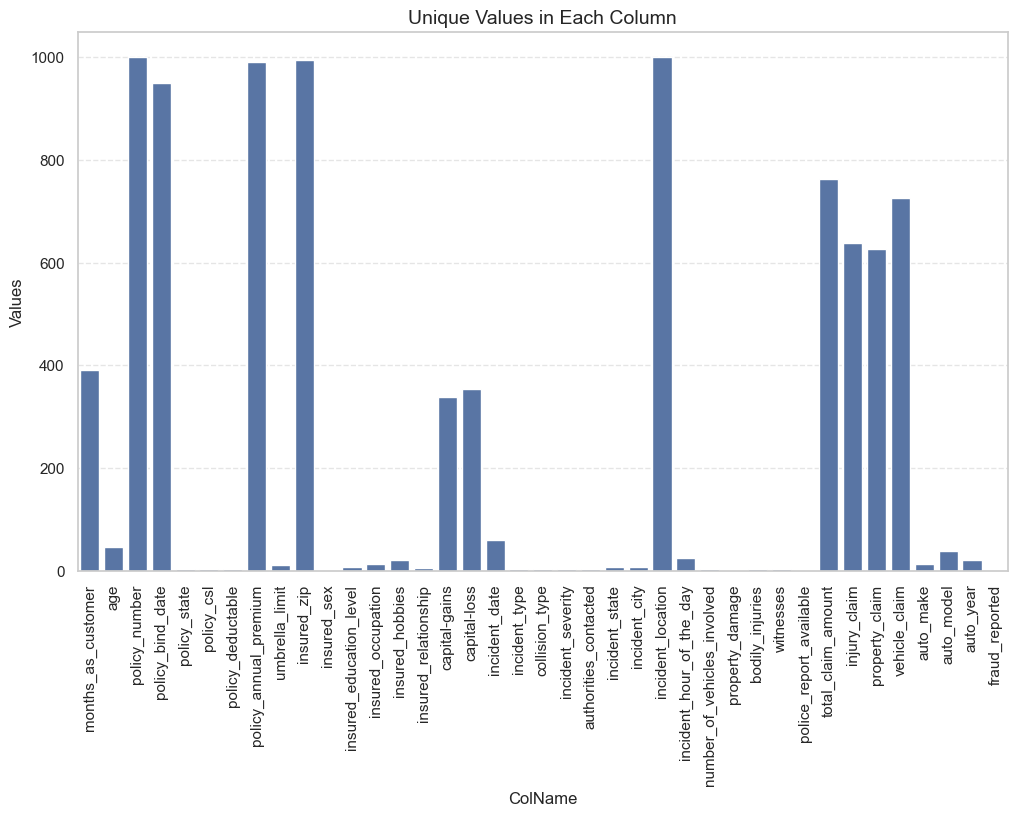

In [40]:
unique = df.nunique().to_frame()
unique.columns = ['Values']
unique.index.names = ['ColName']
unique = unique.reset_index()
plt.figure(figsize=(12,7))
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName', y='Values', data=unique)
plt.xticks(rotation=90)
plt.title('Unique Values in Each Column', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [41]:
unique.sort_values(by='Values', ascending=False, inplace=True)
print(unique)

                        ColName  Values
2                 policy_number    1000
24            incident_location    1000
9                   insured_zip     995
7         policy_annual_premium     991
3              policy_bind_date     951
31           total_claim_amount     763
34                vehicle_claim     726
32                 injury_claim     638
33               property_claim     626
0            months_as_customer     391
16                 capital-loss     354
15                capital-gains     338
17                incident_date      60
1                           age      46
36                   auto_model      39
25     incident_hour_of_the_day      24
37                    auto_year      21
13              insured_hobbies      20
12           insured_occupation      14
35                    auto_make      14
8                umbrella_limit      11
11      insured_education_level       7
22               incident_state       7
23                incident_city       7


In [42]:
dropped_columns = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_date','incident_location',
                   'incident_state','incident_city','insured_hobbies','auto_make','auto_model',
                   'auto_year','age','total_claim_amount']
df.drop(dropped_columns, inplace=True, axis=1)
print(df.head())

ColName  months_as_customer policy_csl  policy_deductable  \
0                       328    250/500               1000   
1                       228    250/500               2000   
2                       134    100/300               2000   
3                       256    250/500               2000   
4                       228   500/1000               1000   

ColName  policy_annual_premium  umbrella_limit insured_sex  \
0                      1406.91               0        MALE   
1                      1197.22         5000000        MALE   
2                      1413.14         5000000      FEMALE   
3                      1415.74         6000000      FEMALE   
4                      1583.91         6000000        MALE   

ColName insured_education_level insured_occupation insured_relationship  \
0                            MD       craft-repair              husband   
1                            MD  machine-op-inspct       other-relative   
2                           PhD    

In [43]:
#Get target and independent variables
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [ ]:
#Convering categorical variables to numerical using one-hot encoding
#Selecting object columns
categorical_cols = X.select_dtypes(include=['object'])
#Applying the one-hot encoding
categorical_cols = pd.get_dummies(categorical_cols, drop_first=True)
#Replacing all boolean columns with 1s and 0s
categorical_cols.replace({True: 1, False: 0}, inplace=True)
#Examining the results
print(categorical_cols.head())

   policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0             

/var/folders/h6/98ynw3_s661d03748d9b3b580000gn/T/ipykernel_64945/3021236232.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_cols.replace({True: 1, False: 0}, inplace=True)


In [45]:
numerical_cols = X.select_dtypes(include=['int64'])
X = pd.concat([numerical_cols, categorical_cols], axis=1)
print(X.head())

   months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  \
0                1        

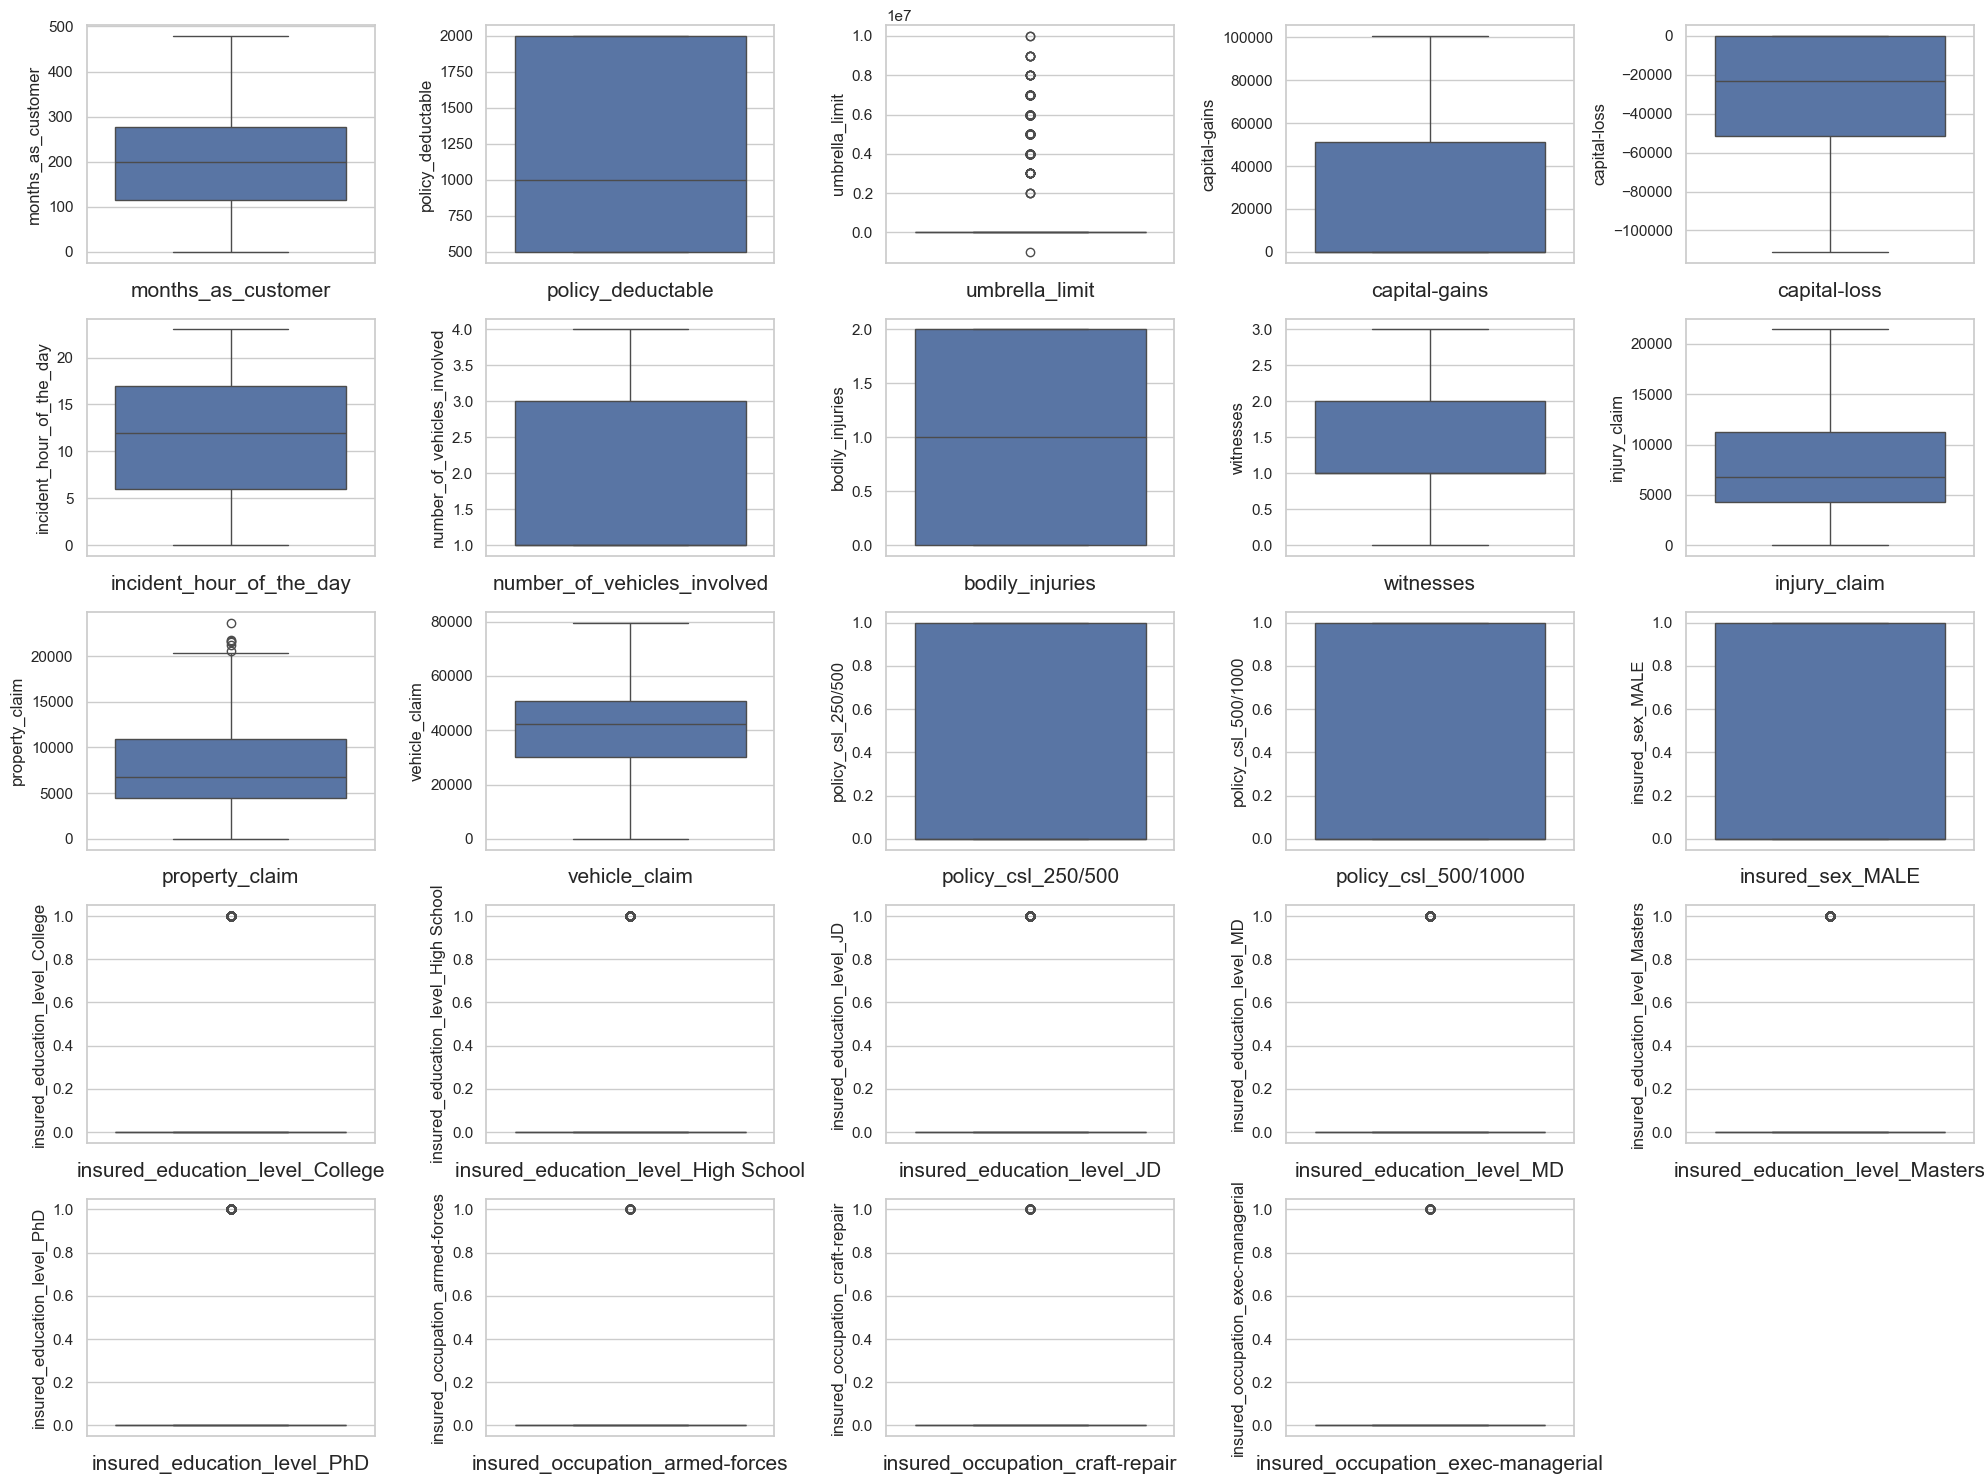

In [46]:
#Outlier checking

plt.figure(figsize=(20,15))
plotnumber=1

for col in X.columns:
    if plotnumber <= 24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
#Selecting numerical columns for scaling
numerical_data = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss','incident_hour_of_the_day',
                          'number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','vehicle_claim','property_claim']]
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
#Creating a DataFrame from the scaled data
numerical_data_scaled = pd.DataFrame(numerical_data_scaled, columns=numerical_data.columns, index=X_train.index)
print(numerical_data_scaled.head())

     months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
901           -1.724402          -1.045349        1.716314      -0.893349   
803           -0.716142          -1.045349       -0.480568       1.450419   
855           -0.075299          -0.230262       -0.480568      -0.893349   
392           -0.399993          -0.230262       -0.480568      -0.893349   
881            1.633616           1.399911       -0.480568       1.501056   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
901      0.952536                  1.622457                    -0.825812   
803     -0.624957                  0.765242                    -0.825812   
855      0.952536                 -0.091972                     1.125885   
392     -0.353714                 -0.949186                     1.125885   
881     -0.821251                  0.908111                    -0.825812   

     bodily_injuries  witnesses  injury_claim  vehicle_claim  property_claim  
9

In [48]:
X_train.drop(columns=numerical_data_scaled.columns, inplace=True)
X_train = pd.concat([X_train, numerical_data_scaled], axis=1)
print(X_train.head())

     policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
901                   1                    0                 0   
803                   1                    0                 0   
855                   1                    0                 1   
392                   0                    0                 0   
881                   1                    0                 1   

     insured_education_level_College  insured_education_level_High School  \
901                                0                                    1   
803                                0                                    0   
855                                0                                    1   
392                                0                                    1   
881                                0                                    0   

     insured_education_level_JD  insured_education_level_MD  \
901                           0                           0   
803           

In [49]:
X_test = X_test[X_train.columns]  # Enforce same column order as training
print("Train features:", X_train.columns.tolist())
print("Test features:", X_test.columns.tolist())  # Debug mismatches

Train features: ['policy_csl_250/500', 'policy_csl_500/1000', 'insured_sex_MALE', 'insured_education_level_College', 'insured_education_level_High School', 'insured_education_level_JD', 'insured_education_level_MD', 'insured_education_level_Masters', 'insured_education_level_PhD', 'insured_occupation_armed-forces', 'insured_occupation_craft-repair', 'insured_occupation_exec-managerial', 'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners', 'insured_occupation_machine-op-inspct', 'insured_occupation_other-service', 'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty', 'insured_occupation_protective-serv', 'insured_occupation_sales', 'insured_occupation_tech-support', 'insured_occupation_transport-moving', 'insured_relationship_not-in-family', 'insured_relationship_other-relative', 'insured_relationship_own-child', 'insured_relationship_unmarried', 'insured_relationship_wife', 'incident_type_Parked Car', 'incident_type_Single Vehicle Collision

In [50]:
from sklearn.svm import SVC
# Initializing and fitting the SVC model
svc_model = SVC()
svc_model.fit(X_train, y_train)
#Predicting on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = svc_model.predict(X_test)
#Calculating the training and testing accuracy
svc_model_train_acc = accuracy_score(y_train, svc_model.predict(X_train))
svc_model_test_acc = accuracy_score(y_test, y_pred)
print('Training Accuracy: ',svc_model_train_acc)
print('Testing Accuracy: ',svc_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Training Accuracy:  0.83
Testing Accuracy:  0.695
Confusion Matrix:
 [[139   0]
 [ 61   0]]
Classification Report:
               precision    recall  f1-score   support

           N       0.69      1.00      0.82       139
           Y       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [51]:
from sklearn.neighbors import KNeighborsClassifier
# Initializing and fitting the KNN model
knn_model = KNeighborsClassifier(n_neighbors = 45)
knn_model.fit(X_train, y_train)
#Predicting on the test set
y_pred = knn_model.predict(X_test)
#Calculating the training and testing accuracy
knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train))
knn_model_test_acc = accuracy_score(y_test, y_pred)
print('Training Accuracy: ',knn_model_train_acc)
print('Testing Accuracy: ',knn_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Training Accuracy:  0.7675
Testing Accuracy:  0.695
Confusion Matrix:
 [[139   0]
 [ 61   0]]
Classification Report:
               precision    recall  f1-score   support

           N       0.69      1.00      0.82       139
           Y       0.00      0.00      0.00        61

    accuracy                           0.69       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.48      0.69      0.57       200



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)
y_pred = dtc_model.predict(X_test)
dtc_model_train_acc = accuracy_score(y_train, dtc_model.predict(X_train))
dtc_model_test_acc = accuracy_score(y_test, y_pred)
print('Training Accuracy: ',dtc_model_train_acc)
print('Testing Accuracy: ',dtc_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Training Accuracy:  1.0
Testing Accuracy:  0.485
Confusion Matrix:
 [[46 93]
 [10 51]]
Classification Report:
               precision    recall  f1-score   support

           N       0.82      0.33      0.47       139
           Y       0.35      0.84      0.50        61

    accuracy                           0.48       200
   macro avg       0.59      0.58      0.48       200
weighted avg       0.68      0.48      0.48       200



In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 9],
    'min_samples_split': range(2,11,1),
    'min_samples_leaf': range(2,11,1)
}

grid_search = GridSearchCV(dtc_model, grid_params, cv=5, n_jobs= -1, verbose=1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
dtc_model_train_acc = accuracy_score(y_train, grid_search.predict(X_train))
dtc_model_test_acc = accuracy_score(y_test, grid_search.predict(X_test))
print('Training Accuracy: ',dtc_model_train_acc)
print('Testing Accuracy: ',dtc_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.79375
Training Accuracy:  0.84875
Testing Accuracy:  0.7
Confusion Matrix:
 [[46 93]
 [10 51]]
Classification Report:
               precision    recall  f1-score   support

           N       0.82      0.33      0.47       139
           Y       0.35      0.84      0.50        61

    accuracy                           0.48       200
   macro avg       0.59      0.58      0.48       200
weighted avg       0.68      0.48      0.48       200



In [54]:
from sklearn.ensemble import RandomForestClassifier
# Initializing the Random Forest Classifier
rfc_model = RandomForestClassifier(criterion='gini',max_depth=15,max_features='sqrt',min_samples_leaf=1,min_samples_split=3,n_estimators=100)
rfc_model.fit(X_train,y_train)
#Predicting on the test set
y_pred = rfc_model.predict(X_test)
#Calculating the training and testing accuracy
rfc_model_train_acc = accuracy_score(y_train, rfc_model.predict(X_train))
rfc_model_test_acc = accuracy_score(y_test, y_pred)
print('Training Accuracy: ',rfc_model_train_acc)
print('Testing Accuracy: ',rfc_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Training Accuracy:  1.0
Testing Accuracy:  0.72
Confusion Matrix:
 [[104  35]
 [ 21  40]]
Classification Report:
               precision    recall  f1-score   support

           N       0.83      0.75      0.79       139
           Y       0.53      0.66      0.59        61

    accuracy                           0.72       200
   macro avg       0.68      0.70      0.69       200
weighted avg       0.74      0.72      0.73       200



In [55]:
from sklearn.ensemble import AdaBoostClassifier
# Initializing the AdaBoost Classifier
abc_model = AdaBoostClassifier()
parameters = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}
grid_search = GridSearchCV(abc_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(X_test)
#Calculating the training and testing accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
abc_model_train_acc = accuracy_score(y_train, grid_search.predict(X_train))
abc_model_test_acc = accuracy_score(y_test, grid_search.predict(X_test))
print('Training Accuracy: ',abc_model_train_acc)
print('Testing Accuracy: ',abc_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}
0.7762500000000001
Training Accuracy:  0.8225
Testing Accuracy:  0.81
Confusion Matrix:
 [[120  19]
 [ 19  42]]
Classification Report:
               precision    recall  f1-score   support

           N       0.86      0.86      0.86       139
           Y       0.69      0.69      0.69        61

    accuracy                           0.81       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.81      0.81      0.81       200



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
# Initializing the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
#Predicting on the test set
y_pred = gbc_model.predict(X_test)
#Calculating the training and testing accuracy
from sklearn.metrics import accuracy_score
gbc_train_accuracy = accuracy_score(y_train, gbc_model.predict(X_train))
gbc_test_accuracy = accuracy_score(y_test, gbc_model.predict(X_test))

print('Training Accuracy: ',gbc_train_accuracy)
print('Testing Accuracy: ',gbc_test_accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Training Accuracy:  0.9325
Testing Accuracy:  0.41
Confusion Matrix:
 [[ 28 111]
 [  7  54]]
Classification Report:
               precision    recall  f1-score   support

           N       0.80      0.20      0.32       139
           Y       0.33      0.89      0.48        61

    accuracy                           0.41       200
   macro avg       0.56      0.54      0.40       200
weighted avg       0.66      0.41      0.37       200



In [57]:
sgb_model = GradientBoostingClassifier(subsample=0.92, max_features=0.72)
sgb_model.fit(X_train, y_train)
y_pred = sgb_model.predict(X_test)
#Caluclating the training and testing accuracy
from sklearn.metrics import accuracy_score
sgb_train_accuracy = accuracy_score(y_train, sgb_model.predict(X_train))
sgb_test_accuracy = accuracy_score(y_pred, sgb_model.predict(X_test))
print('Training Accuracy: ',sgb_train_accuracy)
print('Testing Accuracy: ',sgb_test_accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Training Accuracy:  0.93125
Testing Accuracy:  1.0
Confusion Matrix:
 [[  5 134]
 [  2  59]]
Classification Report:
               precision    recall  f1-score   support

           N       0.71      0.04      0.07       139
           Y       0.31      0.97      0.46        61

    accuracy                           0.32       200
   macro avg       0.51      0.50      0.27       200
weighted avg       0.59      0.32      0.19       200



In [58]:
from sklearn.preprocessing import LabelEncoder
# Encoding the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
from xgboost import XGBClassifier
# Initializing the XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
#Predicting on the test set
y_pred = xgb_model.predict(X_test)
#Calculating the training and testing accuracy
from sklearn.metrics import accuracy_score
xgb_model_train_acc = accuracy_score(y_train, xgb_model.predict(X_train))
xgb_test_model_acc = accuracy_score(y_test, xgb_model.predict(X_test))
print('Training Accuracy: ',xgb_model_train_acc)
print('Testing Accuracy: ',xgb_test_model_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Training Accuracy:  1.0
Testing Accuracy:  0.76
Confusion Matrix:
 [[115  24]
 [ 24  37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       139
           1       0.61      0.61      0.61        61

    accuracy                           0.76       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.76      0.76      0.76       200



In [59]:
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': range(2,12,1)
    }
grid = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5, verbose=0,n_jobs=-1)
grid_search.fit(X_train, y_train)
xgb = grid_search.best_estimator_
y_pred = xgb.predict(X_test)
#Calculating the training and testing accuracy
xgb_train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_accuracy = accuracy_score(y_test, xgb.predict(X_test))
print('Training Accuracy: ',xgb_train_accuracy)
print('Testing Accuracy: ',xgb_test_accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.

Training Accuracy:  0.8225
Testing Accuracy:  0.81
Confusion Matrix:
 [[120  19]
 [ 19  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       139
           1       0.69      0.69      0.69        61

    accuracy                           0.81       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.81      0.81      0.81       200



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~

In [60]:
from catboost import CatBoostClassifier
# Initializing the CatBoost Classifier
cat_model = CatBoostClassifier(iterations=15)
cat_model.fit(X_train, y_train)
#Predicting on the test set
y_pred = cat_model.predict(X_test)
#Calculating the training and testing accuracy
cat_model_train_acc = accuracy_score(y_train, cat_model.predict(X_train))
cat_model_test_acc = accuracy_score(y_test, y_pred)
print('Training Accuracy: ',cat_model_train_acc)
print('Testing Accuracy: ',cat_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Learning rate set to 0.440634
0:	learn: 0.5734058	total: 4.82ms	remaining: 67.5ms
1:	learn: 0.4502026	total: 6.18ms	remaining: 40.2ms
2:	learn: 0.4196844	total: 7.61ms	remaining: 30.4ms
3:	learn: 0.3884270	total: 8.71ms	remaining: 24ms
4:	learn: 0.3772922	total: 9.8ms	remaining: 19.6ms
5:	learn: 0.3625637	total: 10.9ms	remaining: 16.3ms
6:	learn: 0.3504819	total: 12ms	remaining: 13.7ms
7:	learn: 0.3360610	total: 13ms	remaining: 11.4ms
8:	learn: 0.3174108	total: 14ms	remaining: 9.36ms
9:	learn: 0.3027077	total: 15.1ms	remaining: 7.56ms
10:	learn: 0.2845019	total: 16.4ms	remaining: 5.95ms
11:	learn: 0.2752519	total: 17.5ms	remaining: 4.38ms
12:	learn: 0.2538734	total: 18.6ms	remaining: 2.86ms
13:	learn: 0.2464613	total: 19.6ms	remaining: 1.4ms
14:	learn: 0.2364071	total: 20.7ms	remaining: 0us
Training Accuracy:  0.93
Testing Accuracy:  0.735
Confusion Matrix:
 [[114  25]
 [ 28  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80    

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
# Initializing the Extra Trees Classifier
etc_model = ExtraTreesClassifier()
etc_model.fit(X_train, y_train)
#Predicting on the test set
y_pred = etc_model.predict(X_test)
#Calculating the training and testing accuracy
etc_model_train_acc = accuracy_score(y_train, etc_model.predict(X_train))
etc_model_test_acc = accuracy_score(y_test, y_pred)
print('Training Accuracy: ',etc_model_train_acc)
print('Testing Accuracy: ',etc_model_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))    

Training Accuracy:  1.0
Testing Accuracy:  0.785
Confusion Matrix:
 [[126  13]
 [ 30  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.85       139
           1       0.70      0.51      0.59        61

    accuracy                           0.79       200
   macro avg       0.76      0.71      0.72       200
weighted avg       0.78      0.79      0.77       200



In [62]:
from sklearn.ensemble import VotingClassifier
# Initializing the Voting Classifier
classifiers = [('Support Vector Classifier', svc_model),
               ('K-Nearest Neighbors', knn_model),
               ('Decision Tree Classifier', dtc_model),
               ('Random Forest Classifier', rfc_model),
               ('AdaBoost Classifier', ada_model),
               ('Gradient Boosting Classifier', gbc_model),
               ('Stochastic Gradient Boosting Classifier', sgb_model),
               ('XGBoost Classifier', xgb_model),
               ('CatBoost Classifier', cat_model),
               ('Extra Trees Classifier', etc_model)]
vc_model = VotingClassifier(estimators=classifiers)
vc_model.fit(X_train,y_train)
#Predicting on the test set
y_pred = vc_model.predict(X_test)
#Calculating the training and testing accuracy
vc_train_acc = accuracy_score(y_train, vc_model.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)
print('Training Accuracy: ',vc_train_acc)
print('Testing Accuracy: ',vc_test_acc)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Learning rate set to 0.440634
0:	learn: 0.5734058	total: 1.41ms	remaining: 19.7ms
1:	learn: 0.4502026	total: 2.51ms	remaining: 16.3ms
2:	learn: 0.4196844	total: 3.87ms	remaining: 15.5ms
3:	learn: 0.3884270	total: 4.92ms	remaining: 13.5ms
4:	learn: 0.3772922	total: 5.99ms	remaining: 12ms
5:	learn: 0.3625637	total: 7.1ms	remaining: 10.7ms
6:	learn: 0.3504819	total: 8.12ms	remaining: 9.28ms
7:	learn: 0.3360610	total: 9.25ms	remaining: 8.1ms
8:	learn: 0.3174108	total: 10.4ms	remaining: 6.9ms
9:	learn: 0.3027077	total: 11.4ms	remaining: 5.7ms
10:	learn: 0.2845019	total: 12.5ms	remaining: 4.54ms
11:	learn: 0.2752519	total: 13.6ms	remaining: 3.39ms
12:	learn: 0.2538734	total: 14.8ms	remaining: 2.27ms
13:	learn: 0.2464613	total: 15.9ms	remaining: 1.13ms
14:	learn: 0.2364071	total: 16.9ms	remaining: 0us
Training Accuracy:  0.9475
Testing Accuracy:  0.805
Confusion Matrix:
 [[121  18]
 [ 21  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.

In [63]:
#MODEL COMPARISON
models = pd.DataFrame({
    'Model': ['Support Vector Classifier', 'K-Nearest Neighbors', 'Decision Tree Classifier', 
              'Random Forest Classifier', 'AdaBoost Classifier',
              'Gradient Boosting Classifier', 'Stochastic Gradient Boosting Classifier',
              'XGBoost Classifier', 'CatBoost Classifier', 'Extra Trees Classifier', 'Voting Classifier'],
    'Training Accuracy': [svc_model_train_acc, knn_model_train_acc, dtc_model_train_acc, 
                         rfc_model_train_acc, abc_model_train_acc,
                         gbc_train_accuracy, sgb_train_accuracy, xgb_train_accuracy,
                         cat_model_train_acc, etc_model_train_acc, vc_train_acc],
    'Testing Accuracy': [svc_model_test_acc, knn_model_test_acc, dtc_model_test_acc, 
                        rfc_model_test_acc, abc_model_test_acc,
                        gbc_test_accuracy, sgb_test_accuracy, xgb_test_accuracy,
                        cat_model_test_acc, etc_model_test_acc, vc_test_acc]
})
models.sort_values(by='Testing Accuracy', ascending=False, inplace=True)
print(models)

                                      Model  Training Accuracy  \
6   Stochastic Gradient Boosting Classifier            0.93125   
4                       AdaBoost Classifier            0.82250   
7                        XGBoost Classifier            0.82250   
10                        Voting Classifier            0.94750   
9                    Extra Trees Classifier            1.00000   
8                       CatBoost Classifier            0.93000   
3                  Random Forest Classifier            1.00000   
2                  Decision Tree Classifier            0.84875   
0                 Support Vector Classifier            0.83000   
1                       K-Nearest Neighbors            0.76750   
5              Gradient Boosting Classifier            0.93250   

    Testing Accuracy  
6              1.000  
4              0.810  
7              0.810  
10             0.805  
9              0.785  
8              0.735  
3              0.720  
2              0.700  


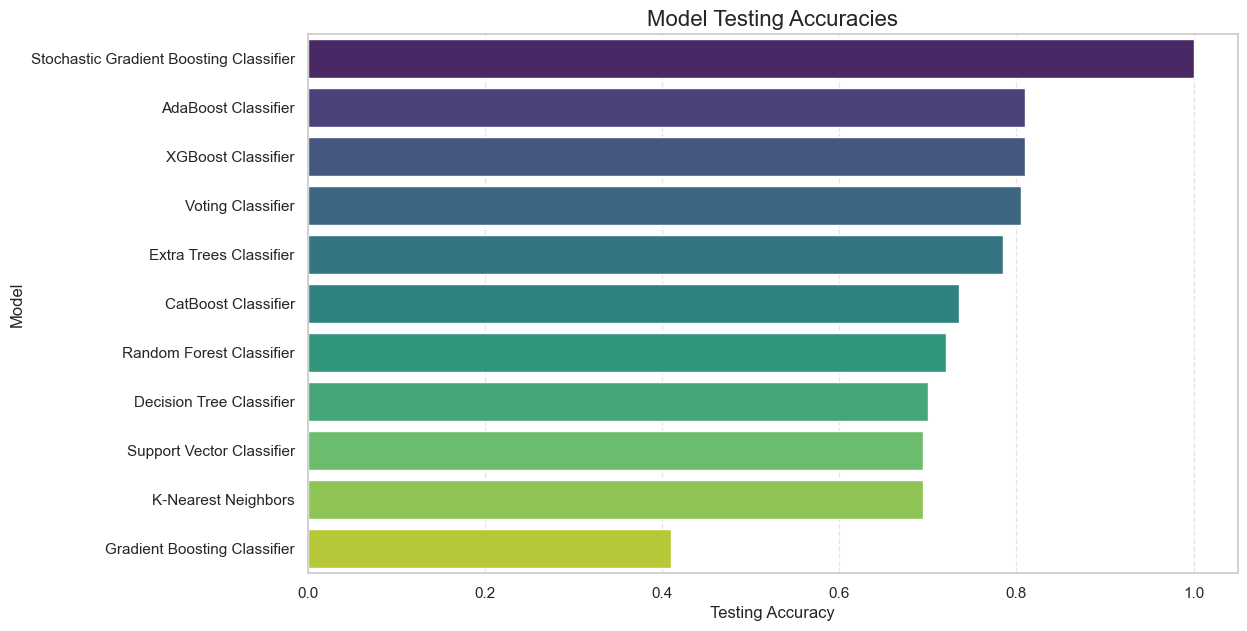

In [65]:
#PLOTTING THE MODEL ACCURACIES
plt.figure(figsize=(12,7))
sns.barplot(x='Testing Accuracy', y='Model', data=models, hue='Model', palette='viridis')
plt.title('Model Testing Accuracies', fontsize=16)
plt.xlabel('Testing Accuracy')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()